In [4]:
import sys
sys.path.insert(0, "../src/main/python/")
from models import ConfigManager
from models import BinaryTextClassifier

import pandas as pd

In [5]:
logistic_regression_model = BinaryTextClassifier(artifacts_folder='../models/model02')
multilayer_perceptron_model = BinaryTextClassifier(artifacts_folder='../models/model01')

In [7]:
dataset = pd.read_csv('../data/BalancedTweets.csv', sep=',')

In [9]:
texts = dataset['Tweet'].to_list()
labels = dataset['ISIS Flag'].to_list()
logistic_regression_predictions = logistic_regression_model.predict(texts)
multilayer_perceptron_predictions = multilayer_perceptron_model.predict(texts)

2021-11-27 23:52:37.495810: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1315680000 exceeds 10% of free system memory.
2021-11-27 23:52:45.360357: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1315680000 exceeds 10% of free system memory.


In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_logistic_regression, tpr_logistic_regression, thresholds_logistic_regression = roc_curve(labels, logistic_regression_predictions)
fpr_multilayer_perceptron, tpr_multilayer_perceptron, thresholds_multilayer_perceptron = roc_curve(labels, multilayer_perceptron_predictions)

In [13]:
auc_logistic_regression = auc(fpr_logistic_regression, tpr_logistic_regression)
auc_multilayer_perceptron = auc(fpr_multilayer_perceptron, tpr_multilayer_perceptron)

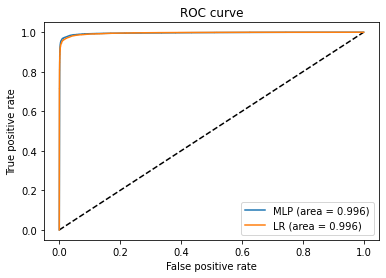

In [15]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_multilayer_perceptron, tpr_multilayer_perceptron, label='MLP (area = {:.3f})'.format(auc_multilayer_perceptron))
plt.plot(fpr_logistic_regression, tpr_logistic_regression, label='LR (area = {:.3f})'.format(auc_logistic_regression))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()